# Визуализация данных

Булыгин Олег  
FB: [fb.com/obulygin91](fb.com/obulygin91)  
VK: [vk.com/obulygin91](vk.com/obulygin91)  
LinkedIn: [linkedin.com/in/obulygin](linkedin.com/in/obulygin)  
Telegram: @obulygin91  
email: obulygin91@ya.ru  


## План
- библиотека matplotlib  
- библиотека seaborn
- основные типы визуализаций

Визуализация данных – это представление данных в виде, который обеспечивает наиболее эффективную работу человека по их изучению. 

Очень важный инструмент в рамках [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis), который облегчает определение распределений, поиск аномалий, зависимостей, первичное выдвижение гипотез и пр.

Важность визуализации может продемонстрировать [квартет Энскомба](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

In [6]:
#увеличим дефолтный размер графиков
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = 13,6

# <center> Matplotlib

Text(0.5, 0, 'Подпись оси')

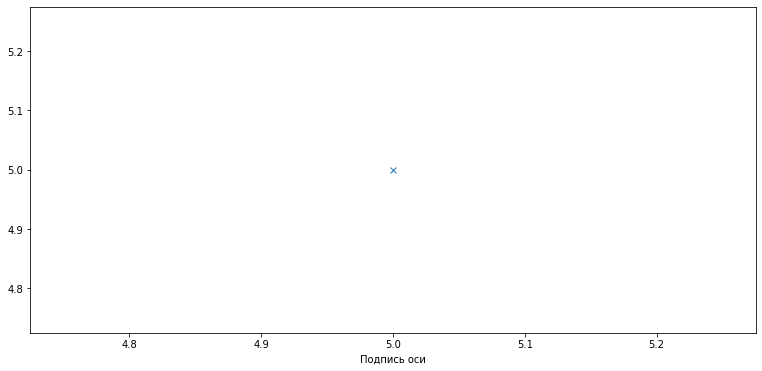

In [7]:
plt.plot(5, 5, 'x')
plt.xlabel('Подпись оси')
# plt.show()

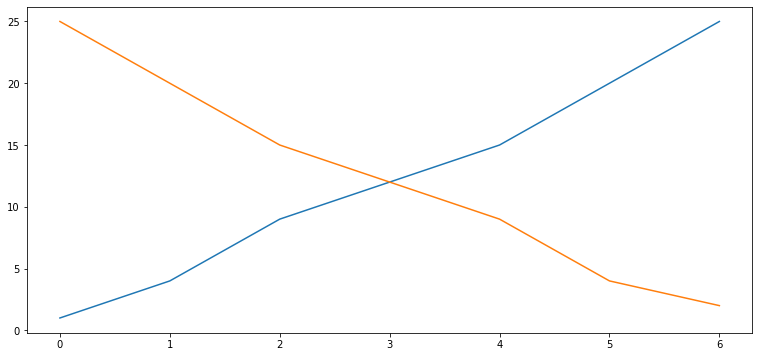

In [8]:
plt.plot([1, 4, 9, 12, 15, 20, 25])
# plt.show()
plt.plot([25, 20, 15, 12, 9, 4, 2])

Поработаем с данными о продажах и оценках видео-игр с [Kaggle Datasets](https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv).

In [10]:
df = pd.read_csv('vgsales-12-4-2019-short.csv')

In [11]:
print(df.shape)

(55792, 16)


In [13]:
df.info()
# что видим?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


In [14]:
# переведем для порядка годы к integer
df['Year'] = df.Year.astype('Int64')

In [15]:
df.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000


In [16]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009


## График

– один из наиболее часто используемых типов визуализаций. 

Отлично подходит, если:
- набор данных непрерывен;
- количество значений больше 20;
- необходимо выявить тенденцию.

Построим график динамики продажи видеоигр

In [17]:
dynamics_by_region = df[[x for x in df.columns if 'Sales' in x] + ['Year']] \
    .groupby('Year').sum()
dynamics_by_region

,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
Year,,,,,
1970,1.16,0.45,0.21,0.45,0.05
1973,0.00,0.00,0.00,0.00,0.00
1975,0.00,0.00,0.00,0.00,0.00
1977,2.50,2.34,0.14,0.00,0.02
1978,6.19,5.77,0.36,0.00,0.04
1979,0.31,0.29,0.02,0.00,0.00
1980,2.58,2.41,0.15,0.00,0.02
1981,10.49,9.77,0.62,0.00,0.11
1982,35.69,33.33,1.96,0.00,0.33


Text(0, 0.5, 'Продажи, млн.')

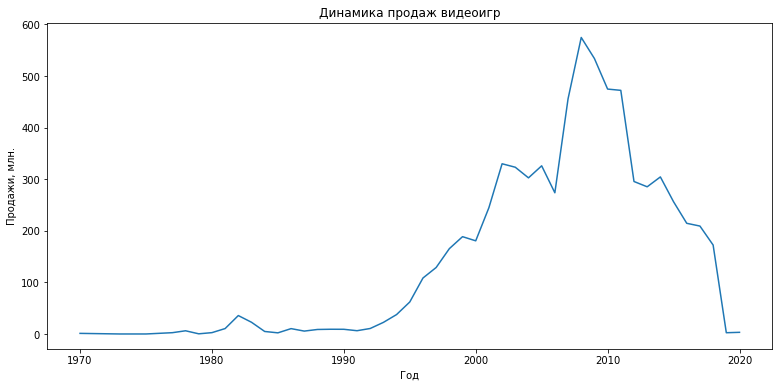

In [18]:
# применяем функцию plot из matplotlib
# для каждой дополнительной настройки есть своя функция
plt.plot(dynamics_by_region.index, dynamics_by_region.Global_Sales)
plt.title('Динамика продаж видеоигр')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

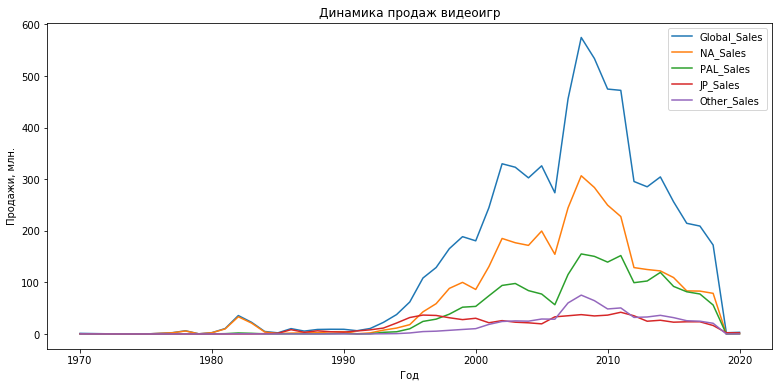

In [19]:
# можем использовать цикл, чтобы построить графики для каждого региона
for region in [x for x in df.columns if 'Sales' in x]:
    plt.plot(dynamics_by_region.index, dynamics_by_region[region])
    plt.title('Динамика продаж видеоигр')
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн.') 
    plt.legend(dynamics_by_region)

Метод .plot() в pandas основан на matplotlib. Если мы работаем с датафреймами, то это, как правило, более удобный вариант, чем использование matplotlib самой по себе. Мы сконцентрируемся на этом варианте.

Документация: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Аргумент kind, позволяет задать тип графика. Исчерпывающий список типов визуализации:

- bar – столбчатая диаграмма;
- barh – горизонтальная столбчатая диаграмма;
- hist – гистограмма;
- box – “ящик с усами”;
- kde – ядерная оценка плотности;
- area – диаграмма с областями накопления;
- pie – круговая диаграмма
- scatter – точечная диаграмма;
- hexbin – гексагональная диаграмма.

AttributeError: 'Line2D' object has no property 'xlabel'

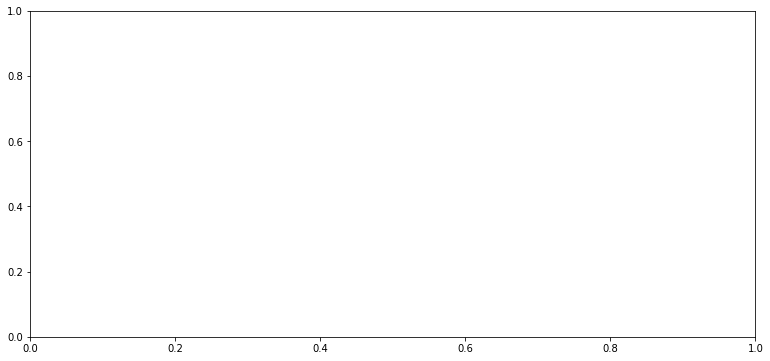

In [20]:
# если работает с табличными структурами, то можем воспользоваться функционалом, 
# встроенным в pandas. Так удобнее
# Метод plot по-умолчанию использует индекс датафрейма для оси Y
# метод plot по-умолчанию строит график
ax = dynamics_by_region['Global_Sales'].plot(title='Динамика продаж видеоигр', 
                                        xlabel='Год', 
                                        ylabel='Продажи, млн.')

In [ ]:
# plot без цикла построит графики для каждого региона (столбца)
# если у plot нету нужных методов, то можно применить функции matplotlib
ax = dynamics_by_region.plot(title='Динамика продаж видеоигр', 
                             xlabel='Год', 
                             ylabel='Продажи, млн.')
ax.text(2007, 580, 'Почему отсюда начался спад?')  
ax.legend(loc='upper left')

## Area chart

аналогична графику, но пространство между осью Х и линией графика заполняется цветом или рисунком. 

Лучше всего подходит для отображения изменений в составе комплексной величины с течением времени. 

Если категорий больше 3-5, то ее использование вряд ли будет оправдано.


In [ ]:
# по-умолчанию  Area chart всегда накопительный
ax = dynamics_by_region.plot(kind='area',
                             stacked=False,
                             title='Динамика продаж видеоигр', 
                             xlabel='Год', 
                             ylabel='Продажи, млн.')

## Гистограммы

используется в статистике для представления распределения величины. 

По горизонтальной оси откладывается диапазон наблюдаемых значений, разбитый на определенное число (обычно 10-15) интервалов, а по вертикальной – вероятность или частота ее попадания в каждый интервал. 

По форме гистограммы аналитик может оценить, какому статистическому закону распределения подчиняется величина.


In [ ]:
# распределение оценок пользователей
df.User_Score.plot(kind='hist', 
                   bins=15,
                   title='User Score distribution',
                   xlabel='USer score',
                   ylabel='Games',
                   xticks=range(1, 11))

# # распределение оценок критиков
# df.Critic_Score.plot(kind='hist', 
#                      bins=10,
#                      title='Critic Score distribution',
#                      xlabel='Critic score',
#                      ylabel='Games',
#                      alpha = 0.5,
#                      density = True,                     
#                      xticks=range(1, 11))

In [ ]:
# распределение оценок критиков
df.Critic_Score.plot(kind='hist', 
                     bins=10,
                     title='Critic Score distribution',
                     xlabel='Critic score',
                     ylabel='Games',
                     xticks=range(1, 11))

## Столбчатая диаграмма

идеально подходит для сравнения показателей. 

Горизонтальные столбчатые диаграммы обычно используют, когда нужно сравнить показатели между собой. 

А вертикальные вариант хорошо подходит для демонстрации изменения показателя в разные периоды.

In [ ]:
# количество игр в разрезе платформ
games_by_platforms = df[['Name', 'Platform']].groupby('Platform').count()
games_by_platforms

In [ ]:
games_by_platforms.loc[['PC', 'X360', 'PS3', 'PS4', 'XOne']].plot(kind='bar', 
                                                                  title='Platforms by Global Sales',
                                                                  xlabel='Critic score',
                                                                  ylabel='Global Sales')

In [ ]:
# топ-5 жанров по продажам
top5_genres = df[['Global_Sales', 'Genre']].groupby(by='Genre').sum().sort_values(by='Global_Sales', ascending=False).head(5)
ax = top5_genres.plot(kind='bar')
for i, val in enumerate(top5_genres.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [ ]:
# динамика продаж в разрезе регионов. Выглядит фигово
dynamics_by_region.plot(kind='bar')

In [ ]:
# Сделаем с накоплением!
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='bar', stacked=True)

## Круговая диаграмма

[~~худшая диаграмма на свете~~](https://habr.com/ru/company/otus/blog/424647/)  
распространенный способ показать структуру набора данных (какую часть от общего количества составляют отдельные значения).
  
Круговые диаграммы не предназначены для сравнения отдельных категорий друг с другом.

По возможности избегайте их. Мы хорошо воспринимаем длины и размеры, но углы и площади нам воспринимать и сравнивать тяжело.


In [ ]:
# количество игр по платформам
pie_data = df.Platform.value_counts().sort_values(ascending = False).head(10)
ax = pie_data.plot(kind='pie',
                   title='Quantity of games by platforms')

In [ ]:
# количество игр по платформам (берем только топ-5)
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5)
ax = top_platforms.plot(kind='pie')
ax.legend()

## Boxplot

используется в описательной статистике, компактно изображает распределение величин. Одна из немногих визуализаций, позволяющая показать выбросы.

In [ ]:
# очень хорошо подходит для поиска выбросов!
df.User_Score.plot(kind='box',
                   title='User Score distribution')

In [ ]:
df[['User_Score', 'Critic_Score']].plot(kind='box',
                                        title='Score distributionn')

## Точечная диаграмма

Каждому наблюдению соответствует точка, координаты которой равны значениям двух параметров этого наблюдения. 

Используются для изучения взаимосвязи между двумя переменными. Также помогают выявлять выбросы.


In [ ]:
# посмотрим на взимосвязь оценок и продаж
df.plot(kind='scatter', 
        x='User_Score', 
        y='Global_Sales', 
        title='Correlation between Global Sales and User Score')
plt.show()
df.plot(kind='scatter', 
        x='Critic_Score', 
        y='Global_Sales', 
        title='Correlation between Global Sales and Critic Score')

In [ ]:
# добавим третью ось
df.plot(kind='scatter', 
        x='User_Score', 
        y='Critic_Score', 
        s=df.Global_Sales*80,
        title='Correlation between Global Sales and User Score',
       )

## Стилизация таблиц

Когда построение визуализации неоправданно, можно стилизовать табличную структуру при помощи встроенных инструментов pandas, добавив нужные акценты для лучшего ее восприятия.

Документация: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [ ]:
# выведем информацию о топ-10 издателях по продажам
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

In [ ]:
top_developers_df.style.bar(align='mid')

# <center> Seaborn
   
Seaborn – популярная библиотека готовых шаблонов для статистической визуализации, написанная на основе matplotlib.

Имеет выразительный высокоуровневый интерфейс (построение большинства простых графиков происходит в одну строчку кода), а встроенные в нее стили более приятны.

Импорт: import seaborn as sns (библиотека названа в честь Сэмюела Нормана Сиборна (S.N.S) – героя сериала The West Wing, который очень любил автор библиотеки).

Документация: https://seaborn.pydata.org/tutorial.html

In [ ]:
import seaborn as sns

In [ ]:
# посмотрим зависимость продаж и оценок критиков
ax = sns.regplot(data=df, x='Critic_Score', y='Global_Sales', color='green', marker='+')
ax.set_title('Correlation between Global Sales and Critic Scores')

C помощью `seaborn` можно построить достаточно сложные визуализации, которые были бы очень сложны для представления в коде при использовании `matplotlib`. Рассмотрим часть из них.

Посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По-умолчанию на визуализации отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

In [ ]:
ax = sns.distplot(df.Critic_Score)
ax.set_title('Critic Score distribution')

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков можно использовать __`joint_plot`__ – это гибрид `scatter plot` и `histogram`. Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg')

**pair plot (scatter plot matrix)** поможет нам посмотреть на одной картинке, как связаны между собой различные признаки в наборе данных

In [ ]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']])

Давайте **сравним оценки критиков игр для топ-5 крупнейших игровых платформ** при помощи `boxplot`.

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(10).index.values
top_platforms
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])

`Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [ ]:
platform_genre_sales = df[df.Platform.isin(top_platforms)].pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0)

platform_genre_sales

In [ ]:
sns.heatmap(platform_genre_sales)

### Как правильно выбрать тип визуализации?

[DataVizCatalogue](https://datavizcatalogue.com/)  
[ExtremePresentation](https://extremepresentation.com/tools/)  
[А так не надо](https://t.me/awfulcharts)  

### Спасибо за внимание буду рад ответить на ваши вопросы!
Ссылка на форму ОС:
https://forms.gle/6PT45MMePqjLCUdP7